In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

D:\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [2]:
#Read the dataset and look at the starting few rows
df = pd.read_csv('day.csv')
df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df.tail()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [4]:
#droping instant, causal and registered 
#as instant is just the record no. and causal and registered together add up to the target - cnt
df.drop(['instant', 'casual', 'registered'], inplace=True, axis = 1)
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(8), object(1)
memory usage: 74.3+ KB


In [6]:
# Converting the dtedat to Date Time
df['dteday'] = pd.to_datetime(df['dteday'])
df['dteday'].dtypes

dtype('<M8[ns]')

In [7]:
# Friendlier month names
import calendar
df['mnth'] = df['mnth'].apply(lambda x: calendar.month_abbr[x])
df['mnth'].unique()


array(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'], dtype=object)

In [8]:
df[['season','weekday','weathersit']] = df[['season','weekday','weathersit']].astype(str)

In [9]:
df.info()
#No null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
dteday        730 non-null datetime64[ns]
season        730 non-null object
yr            730 non-null int64
mnth          730 non-null object
holiday       730 non-null int64
weekday       730 non-null object
workingday    730 non-null int64
weathersit    730 non-null object
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(4), object(4)
memory usage: 74.3+ KB


In [10]:
#stats on temp, and other variables
df[['temp', 'atemp', 'hum', 'windspeed']].describe()

,temp,atemp,hum,windspeed
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620
std,7.506729,8.150308,14.237589,5.195841
min,2.424346,3.953480,0.000000,1.500244
25%,13.811885,16.889713,52.000000,9.041650
50%,20.465826,24.368225,62.625000,12.125325
75%,26.880615,30.445775,72.989575,15.625589
max,35.328347,42.044800,97.250000,34.000021


In [11]:
df['weathersit'].replace(['1','2','3','4'],['Good', 'Average', 'Bad', 'Very Bad'], inplace=True)

In [12]:
df['season'].replace(['1','2','3','4'],['spring', 'summer', 'fall', 'winter'], inplace=True)

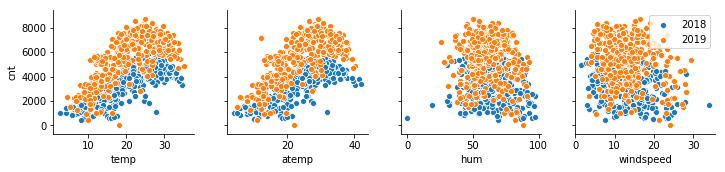

In [13]:
x =sns.pairplot(df,  x_vars=['temp', 'atemp', 'hum', 'windspeed'], y_vars=['cnt'] , hue='yr' )
x._legend.remove()
plt.legend(labels=['2018', '2019'])
plt.show()

In [14]:
#We can see above that both temp and atemp have linear relationship with cnt
#2019 higher sales numbers can be seen

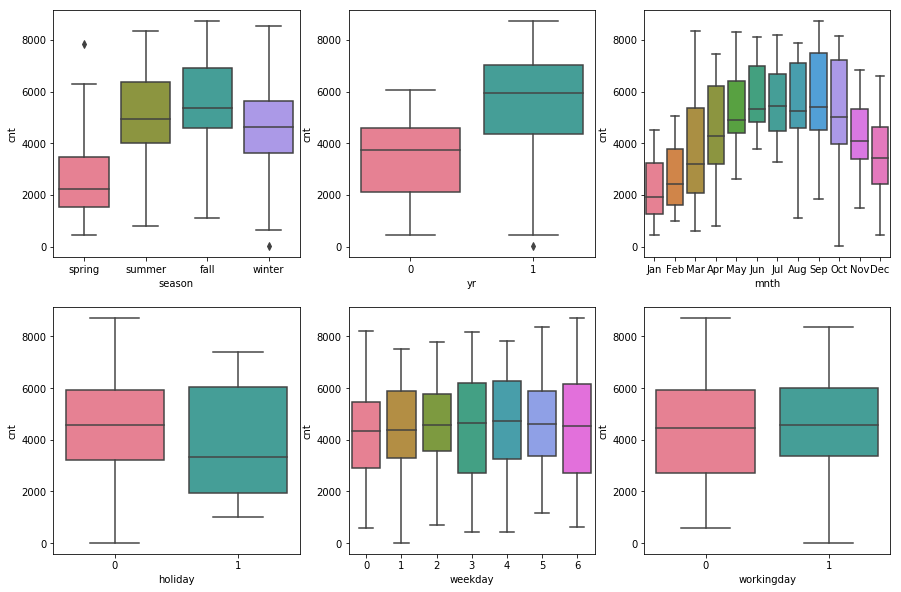

In [15]:
# Checking the distribution of rentals across different categorical variables
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.boxplot(x='season', y='cnt', data=df, palette='husl')
plt.subplot(2,3,2)
sns.boxplot(x='yr', y='cnt', data=df, palette='husl')
plt.subplot(2,3,3)
sns.boxplot(x='mnth', y='cnt', data=df, palette='husl')
plt.subplot(2,3,4)
sns.boxplot(x='holiday', y='cnt', data=df, palette='husl')
plt.subplot(2,3,5)
sns.boxplot(x='weekday', y='cnt', data=df, palette='husl')
plt.subplot(2,3,6)
sns.boxplot(x='workingday', y='cnt', data=df, palette='husl')

plt.show()

In [16]:
#Sales picks up around weekends
#In summer and fall sales is higher


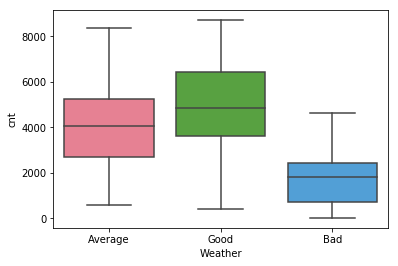

In [17]:
sns.boxplot(x='weathersit', y='cnt', data=df, palette='husl')
plt.xlabel('Weather')
plt.show()

In [18]:
#As can be seen above sales is better in good weather days

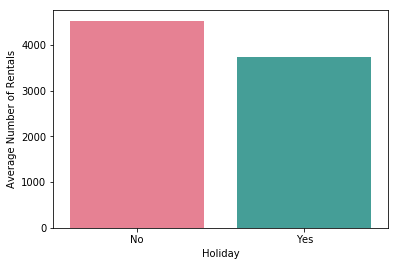

In [19]:
# Checking business on Holidays
holiday_df = df.groupby(['holiday'])['cnt'].mean().reset_index()
sns.barplot(x='holiday', y='cnt', data=holiday_df, palette='husl')
plt.xticks(np.arange(2),('No','Yes'))
plt.xlabel('Holiday')
plt.ylabel('Average Number of Rentals')
plt.show()

In [20]:
#Encode season, mnth, weekday, weathersit
encoded = pd.get_dummies(df[['season','mnth','weekday','weathersit']], drop_first=True)
df = pd.concat([df, encoded], axis=1)   #Axis=1 is for horizontal stacking
df = df.drop(['season','mnth','weekday','weathersit'], axis=1)
df.head()

,dteday,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Bad,weathersit_Good
0,2018-01-01,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,0,0,0,0,0,1,0,0
1,2018-02-01,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,0,0,0,0,0,0,0,0
2,2018-03-01,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,1
3,2018-04-01,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,0,1,0,0,0,0,0,1
4,2018-05-01,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,0,0,1,0,0,0,0,1


In [21]:
# Since we have the month and the Year in two seperate columns, we do not need the date column anymore, thus dropping it
df.drop('dteday', inplace=True, axis = 1)

In [22]:
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [23]:
print('Shape of the Train data is:' , df_train.shape)
print('Shape of the Test data is:' , df_test.shape)

Shape of the Train data is: (510, 30)
Shape of the Test data is: (220, 30)


In [24]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_Oct,mnth_Sep,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_Bad,weathersit_Good
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,1,0,0,0,0,0,1
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,0,0,0,0,1,0,0
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,0,0,0,0,0,1
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,0,0,0,0,1,0,0
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,0,1,...,0,0,0,0,0,0,1,0,0,0


In [25]:
#Scaling
scaler = MinMaxScaler()    #Instantiating the object
cols = df_train.columns
df_train[cols] = scaler.fit_transform(df_train[cols])

D:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
D:\Anaconda\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


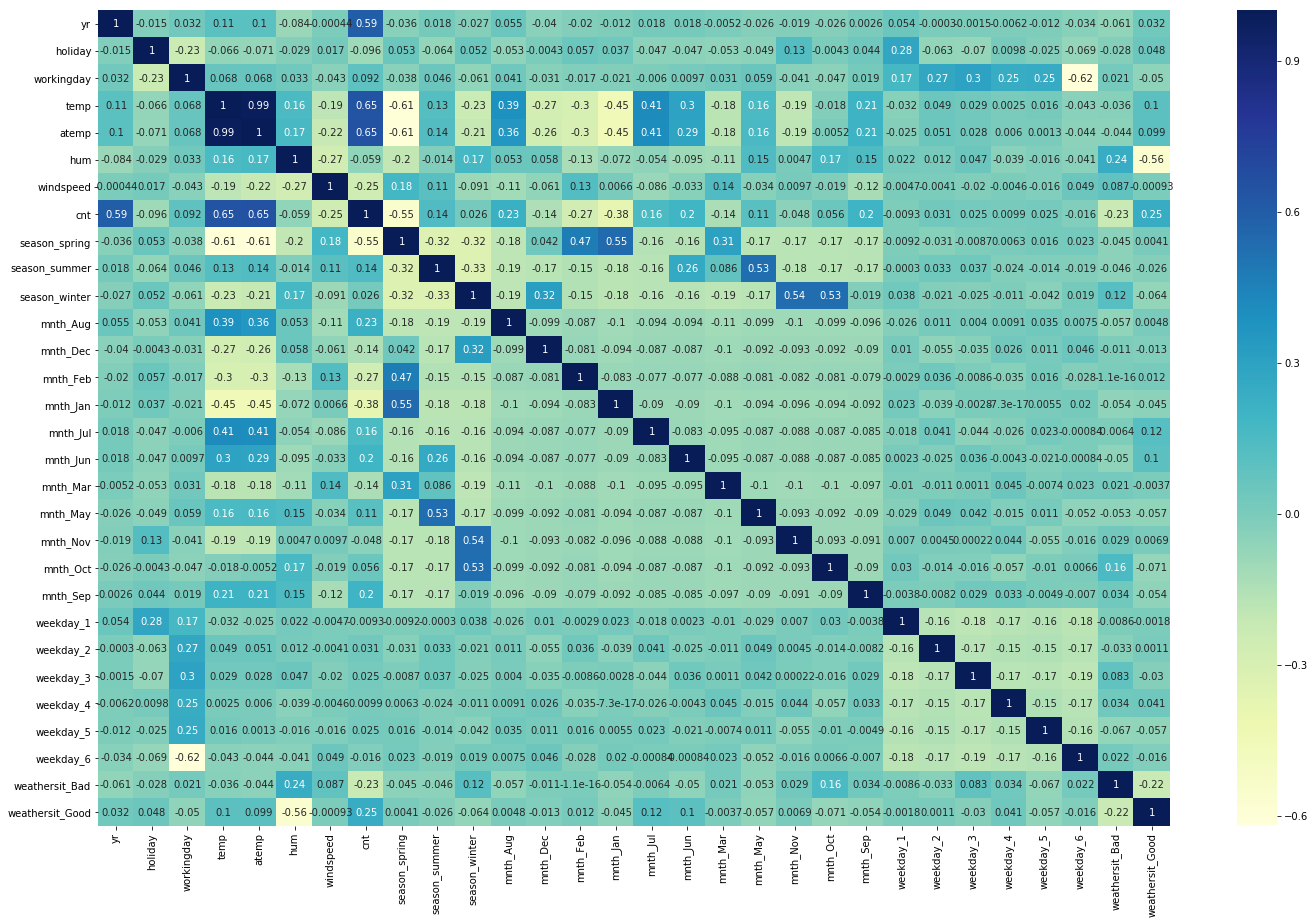

In [26]:
plt.figure(figsize=(24,15))
sns.heatmap(df_train.corr(),annot=True, cmap='YlGnBu')
plt.show()

In [27]:
#target - cnt has strong colinearity with yr, temp, atemp.
#temp and atemp seem to contianing the same information and hence one of them can be dropped

In [28]:
y_train = df_train.pop('cnt')
X_train = df_train
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

D:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Sat, 08 Jan 2022   Prob (F-statistic):          2.81e-180
Time:                        17:25:08   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2247      0.047      4.755      0.000       0.132       0.318
yr                  0.2325      0.008     28.794      0.000       0.217       0.248
holiday            -0.0416      0.024     -1.758      0.079      -0.088       0.005
workingday          0.0438      0.009      4.666      0.000       0.025       0.062
temp                0.3880      0.142      2.727      0.007       0.108       0.668
atemp               0.0590      0.138      0.426      0.670      -0.213       0.331
hum                -0.1520      0.039     -3.938      0.000      -0.228      -0.076
windspeed          -0.1836      0.026     -6.962      0.000      -0.235      -0.132
season_spring      -0.0454      0.030     -1.511      0.131      -0.104       0.014
season_summer       0.0424      0.026      1.617      0.107      -0.009       0.094
season_winter       0.1071      0.028      3.826      0.000       0.052       0.162
mnth_Aug            0.0223      0.034      0.657      0.511      -0.044       0.089
mnth_Dec           -0.0443      0.034     -1.316      0.189      -0.110       0.022
mnth_Feb           -0.0323      0.033     -0.980      0.327      -0.097       0.032
mnth_Jan           -0.0631      0.034     -1.876      0.061      -0.129       0.003
mnth_Jul           -0.0327      0.035     -0.931      0.352      -0.102       0.036
mnth_Jun            0.0060      0.025      0.241      0.810      -0.043       0.055
mnth_Mar            0.0016      0.025      0.063      0.950      -0.047       0.050
mnth_May            0.0255      0.021      1.208      0.228      -0.016       0.067
mnth_Nov           -0.0398      0.036     -1.093      0.275      -0.111       0.032
mnth_Oct            0.0077      0.036      0.215      0.830      -0.063       0.078
mnth_Sep            0.0868      0.032      2.711      0.007       0.024       0.150
weekday_1          -0.0101      0.010     -1.033      0.302      -0.029       0.009
weekday_2          -0.0069      0.011     -0.616      0.538      -0.029       0.015
weekday_3           0.0057      0.011      0.538      0.591      -0.015       0.026
weekday_4           0.0018      0.011      0.168      0.867      -0.020       0.023
weekday_5           0.0116      0.011      1.029      0.304      -0.011       0.034
weekday_6           0.0542      0.015      3.729      0.000       0.026       0.083
weathersit_Bad     -0.1955      0.025     -7.787      0.000      -0.245      -0.146
weathersit_Good     0.0595      0.010      5.701      0.000       0.039       0.080
==============================================================================
Omnibus:                       84.490   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.656
Skew:                          -0.805   Prob(JB):                     1.11

In [29]:
#Correlation test between independent variance - vif
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

D:\Anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
21,weekday_1,inf
23,weekday_3,inf
25,weekday_5,inf
1,holiday,inf
22,weekday_2,inf
24,weekday_4,inf
2,workingday,inf
3,temp,440.24
4,atemp,383.65
5,hum,33.71


In [30]:
#Lets drop columns that are not significant - have high p value and vif
X = X_train.drop('mnth_Mar',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model1 = lr.fit()
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.3
Date:                Sat, 08 Jan 2022   Prob (F-statistic):          2.75e-181
Time:                        17:25:08   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -998.2
Df Residuals:                     482   BIC:                            -879.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2257      0.045      5.044      0.000       0.138       0.314
yr                  0.2325      0.008     28.824      0.000       0.217       0.248
holiday            -0.0416      0.024     -1.760      0.079      -0.088       0.005
workingday          0.0438      0.009      4.680      0.000       0.025       0.062
temp                0.3877      0.142      2.729      0.007       0.109       0.667
atemp               0.0588      0.138      0.425      0.671      -0.213       0.330
hum                -0.1518      0.038     -3.950      0.000      -0.227      -0.076
windspeed          -0.1837      0.026     -6.983      0.000      -0.235      -0.132
season_spring      -0.0447      0.028     -1.575      0.116      -0.101       0.011
season_summer       0.0421      0.026      1.637      0.102      -0.008       0.093
season_winter       0.1074      0.027      3.910      0.000       0.053       0.161
mnth_Aug            0.0216      0.032      0.676      0.499      -0.041       0.084
mnth_Dec           -0.0456      0.026     -1.755      0.080      -0.097       0.005
mnth_Feb           -0.0338      0.022     -1.517      0.130      -0.078       0.010
mnth_Jan           -0.0646      0.022     -2.892      0.004      -0.109      -0.021
mnth_Jul           -0.0333      0.033     -0.999      0.318      -0.099       0.032
mnth_Jun            0.0055      0.024      0.233      0.816      -0.041       0.052
mnth_May            0.0251      0.020      1.268      0.205      -0.014       0.064
mnth_Nov           -0.0410      0.031     -1.333      0.183      -0.102       0.019
mnth_Oct            0.0065      0.031      0.213      0.831      -0.054       0.067
mnth_Sep            0.0859      0.029      2.961      0.003       0.029       0.143
weekday_1          -0.0101      0.010     -1.034      0.302      -0.029       0.009
weekday_2          -0.0069      0.011     -0.617      0.538      -0.029       0.015
weekday_3           0.0057      0.011      0.539      0.590      -0.015       0.026
weekday_4           0.0019      0.011      0.171      0.864      -0.020       0.023
weekday_5           0.0116      0.011      1.030      0.304      -0.010       0.034
weekday_6           0.0543      0.015      3.737      0.000       0.026       0.083
weathersit_Bad     -0.1954      0.025     -7.795      0.000      -0.245      -0.146
weathersit_Good     0.0595      0.010      5.708      0.000       0.039       0.080
==============================================================================
Omnibus:                       84.449   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.878
Skew:                          -0.804   Prob(JB):                     9.93e-52
Kurtosis:                       5.910   Cond. No.                     1.06e+16


In [31]:
# Removing 'weekday_4' due to high P-Value
X = X.drop('weekday_4',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model3 = lr.fit()
lr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.3
Date:                Sat, 08 Jan 2022   Prob (F-statistic):          2.75e-181
Time:                        17:25:08   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -998.2
Df Residuals:                     482   BIC:                            -879.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2257      0.045      5.044      0.000       0.138       0.314
yr                  0.2325      0.008     28.824      0.000       0.217       0.248
holiday            -0.0398      0.030     -1.323      0.186      -0.099       0.019
workingday          0.0456      0.015      3.019      0.003       0.016       0.075
temp                0.3877      0.142      2.729      0.007       0.109       0.667
atemp               0.0588      0.138      0.425      0.671      -0.213       0.330
hum                -0.1518      0.038     -3.950      0.000      -0.227      -0.076
windspeed          -0.1837      0.026     -6.983      0.000      -0.235      -0.132
season_spring      -0.0447      0.028     -1.575      0.116      -0.101       0.011
season_summer       0.0421      0.026      1.637      0.102      -0.008       0.093
season_winter       0.1074      0.027      3.910      0.000       0.053       0.161
mnth_Aug            0.0216      0.032      0.676      0.499      -0.041       0.084
mnth_Dec           -0.0456      0.026     -1.755      0.080      -0.097       0.005
mnth_Feb           -0.0338      0.022     -1.517      0.130      -0.078       0.010
mnth_Jan           -0.0646      0.022     -2.892      0.004      -0.109      -0.021
mnth_Jul           -0.0333      0.033     -0.999      0.318      -0.099       0.032
mnth_Jun            0.0055      0.024      0.233      0.816      -0.041       0.052
mnth_May            0.0251      0.020      1.268      0.205      -0.014       0.064
mnth_Nov           -0.0410      0.031     -1.333      0.183      -0.102       0.019
mnth_Oct            0.0065      0.031      0.213      0.831      -0.054       0.067
mnth_Sep            0.0859      0.029      2.961      0.003       0.029       0.143
weekday_1          -0.0119      0.015     -0.788      0.431      -0.042       0.018
weekday_2          -0.0087      0.015     -0.568      0.570      -0.039       0.022
weekday_3           0.0038      0.015      0.259      0.796      -0.025       0.033
weekday_5           0.0097      0.016      0.622      0.535      -0.021       0.040
weekday_6           0.0543      0.015      3.737      0.000       0.026       0.083
weathersit_Bad     -0.1954      0.025     -7.795      0.000      -0.245      -0.146
weathersit_Good     0.0595      0.010      5.708      0.000       0.039       0.080
==============================================================================
Omnibus:                       84.449   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.878
Skew:                          -0.804   Prob(JB):                     9.93e-52
Kurtosis:                       5.910   Cond. No.                         95.3
==============================================================================

Warn

In [32]:
# Removing 'mnth_Oct' due to high P-Value
X = X.drop('mnth_Oct',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model3 = lr.fit()
lr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Sat, 08 Jan 2022   Prob (F-statistic):          2.68e-182
Time:                        17:25:08   Log-Likelihood:                 527.10
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     483   BIC:                            -885.9
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2274      0.044      5.166      0.000       0.141       0.314
yr                  0.2325      0.008     28.873      0.000       0.217       0.248
holiday            -0.0394      0.030     -1.316      0.189      -0.098       0.019
workingday          0.0455      0.015      3.016      0.003       0.016       0.075
temp                0.3882      0.142      2.736      0.006       0.109       0.667
atemp               0.0589      0.138      0.427      0.670      -0.212       0.330
hum                -0.1511      0.038     -3.951      0.000      -0.226      -0.076
windspeed          -0.1835      0.026     -6.986      0.000      -0.235      -0.132
season_spring      -0.0460      0.028     -1.655      0.099      -0.101       0.009
season_summer       0.0400      0.024      1.684      0.093      -0.007       0.087
season_winter       0.1101      0.024      4.539      0.000       0.062       0.158
mnth_Aug            0.0190      0.029      0.644      0.520      -0.039       0.077
mnth_Dec           -0.0495      0.018     -2.687      0.007      -0.086      -0.013
mnth_Feb           -0.0349      0.022     -1.608      0.108      -0.078       0.008
mnth_Jan           -0.0657      0.022     -3.010      0.003      -0.109      -0.023
mnth_Jul           -0.0360      0.031     -1.161      0.246      -0.097       0.025
mnth_Jun            0.0043      0.023      0.187      0.852      -0.041       0.049
mnth_May            0.0246      0.020      1.253      0.211      -0.014       0.063
mnth_Nov           -0.0462      0.019     -2.426      0.016      -0.084      -0.009
mnth_Sep            0.0827      0.025      3.336      0.001       0.034       0.131
weekday_1          -0.0119      0.015     -0.791      0.429      -0.042       0.018
weekday_2          -0.0088      0.015     -0.569      0.570      -0.039       0.021
weekday_3           0.0038      0.015      0.261      0.794      -0.025       0.033
weekday_5           0.0097      0.016      0.625      0.532      -0.021       0.040
weekday_6           0.0542      0.014      3.738      0.000       0.026       0.083
weathersit_Bad     -0.1952      0.025     -7.800      0.000      -0.244      -0.146
weathersit_Good     0.0596      0.010      5.721      0.000       0.039       0.080
==============================================================================
Omnibus:                       83.679   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.048
Skew:                          -0.799   Prob(JB):                     6.74e-51
Kurtosis:                       5.884   Cond. No.                         95.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correct

In [33]:
X = X.drop('mnth_Jun',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model4 = lr.fit()
lr_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     112.0
Date:                Sat, 08 Jan 2022   Prob (F-statistic):          2.55e-183
Time:                        17:25:08   Log-Likelihood:                 527.08
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     484   BIC:                            -892.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2279      0.044      5.193      0.000       0.142       0.314
yr                  0.2323      0.008     29.009      0.000       0.217       0.248
holiday            -0.0399      0.030     -1.339      0.181      -0.099       0.019
workingday          0.0454      0.015      3.014      0.003       0.016       0.075
temp                0.3961      0.135      2.926      0.004       0.130       0.662
atemp               0.0554      0.137      0.405      0.685      -0.213       0.324
hum                -0.1520      0.038     -4.015      0.000      -0.226      -0.078
windspeed          -0.1841      0.026     -7.081      0.000      -0.235      -0.133
season_spring      -0.0474      0.027     -1.771      0.077      -0.100       0.005
season_summer       0.0393      0.023      1.677      0.094      -0.007       0.085
season_winter       0.1086      0.023      4.756      0.000       0.064       0.153
mnth_Aug            0.0157      0.024      0.662      0.508      -0.031       0.062
mnth_Dec           -0.0490      0.018     -2.690      0.007      -0.085      -0.013
mnth_Feb           -0.0343      0.021     -1.599      0.110      -0.077       0.008
mnth_Jan           -0.0648      0.021     -3.045      0.002      -0.107      -0.023
mnth_Jul           -0.0394      0.025     -1.598      0.111      -0.088       0.009
mnth_May            0.0229      0.017      1.319      0.188      -0.011       0.057
mnth_Nov           -0.0459      0.019     -2.421      0.016      -0.083      -0.009
mnth_Sep            0.0804      0.021      3.744      0.000       0.038       0.123
weekday_1          -0.0118      0.015     -0.785      0.433      -0.041       0.018
weekday_2          -0.0088      0.015     -0.570      0.569      -0.039       0.021
weekday_3           0.0039      0.015      0.266      0.790      -0.025       0.033
weekday_5           0.0097      0.016      0.624      0.533      -0.021       0.040
weekday_6           0.0542      0.014      3.743      0.000       0.026       0.083
weathersit_Bad     -0.1953      0.025     -7.814      0.000      -0.244      -0.146
weathersit_Good     0.0595      0.010      5.725      0.000       0.039       0.080
==============================================================================
Omnibus:                       83.300   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.416
Skew:                          -0.798   Prob(JB):                     2.51e-50
Kurtosis:                       5.864   Cond. No.                         92.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
 
X = X.drop('weekday_3',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model5 = lr.fit()
lr_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.8
Date:                Sat, 08 Jan 2022   Prob (F-statistic):          2.42e-184
Time:                        17:26:09   Log-Likelihood:                 527.04
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     485   BIC:                            -898.2
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2275      0.044      5.192      0.000       0.141       0.314
yr                  0.2323      0.008     29.038      0.000       0.217       0.248
holiday            -0.0381      0.029     -1.314      0.190      -0.095       0.019
workingday          0.0476      0.013      3.723      0.000       0.022       0.073
temp                0.3975      0.135      2.941      0.003       0.132       0.663
atemp               0.0542      0.136      0.397      0.692      -0.214       0.322
hum                -0.1517      0.038     -4.013      0.000      -0.226      -0.077
windspeed          -0.1842      0.026     -7.092      0.000      -0.235      -0.133
season_spring      -0.0472      0.027     -1.768      0.078      -0.100       0.005
season_summer       0.0394      0.023      1.687      0.092      -0.006       0.085
season_winter       0.1088      0.023      4.772      0.000       0.064       0.154
mnth_Aug            0.0157      0.024      0.664      0.507      -0.031       0.062
mnth_Dec           -0.0492      0.018     -2.703      0.007      -0.085      -0.013
mnth_Feb           -0.0342      0.021     -1.594      0.112      -0.076       0.008
mnth_Jan           -0.0647      0.021     -3.045      0.002      -0.106      -0.023
mnth_Jul           -0.0394      0.025     -1.598      0.111      -0.088       0.009
mnth_May            0.0229      0.017      1.322      0.187      -0.011       0.057
mnth_Nov           -0.0460      0.019     -2.431      0.015      -0.083      -0.009
mnth_Sep            0.0804      0.021      3.748      0.000       0.038       0.123
weekday_1          -0.0139      0.013     -1.081      0.280      -0.039       0.011
weekday_2          -0.0109      0.013     -0.831      0.406      -0.037       0.015
weekday_5           0.0076      0.013      0.569      0.570      -0.019       0.034
weekday_6           0.0542      0.014      3.747      0.000       0.026       0.083
weathersit_Bad     -0.1953      0.025     -7.819      0.000      -0.244      -0.146
weathersit_Good     0.0594      0.010      5.728      0.000       0.039       0.080
==============================================================================
Omnibus:                       83.679   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.837
Skew:                          -0.801   Prob(JB):                     1.23e-50
Kurtosis:                       5.872   Cond. No.                         92.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
X = X.drop('atemp',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model6 = lr.fit()
lr_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     122.1
Date:                Sat, 08 Jan 2022   Prob (F-statistic):          2.34e-185
Time:                        17:26:10   Log-Likelihood:                 526.96
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     486   BIC:                            -904.3
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2274      0.044      5.194      0.000       0.141       0.313
yr                  0.2323      0.008     29.061      0.000       0.217       0.248
holiday            -0.0387      0.029     -1.335      0.183      -0.096       0.018
workingday          0.0476      0.013      3.728      0.000       0.023       0.073
temp                0.4489      0.038     11.686      0.000       0.373       0.524
hum                -0.1510      0.038     -4.002      0.000      -0.225      -0.077
windspeed          -0.1863      0.025     -7.322      0.000      -0.236      -0.136
season_spring      -0.0465      0.027     -1.745      0.082      -0.099       0.006
season_summer       0.0403      0.023      1.731      0.084      -0.005       0.086
season_winter       0.1097      0.023      4.841      0.000       0.065       0.154
mnth_Aug            0.0150      0.024      0.635      0.525      -0.031       0.061
mnth_Dec           -0.0491      0.018     -2.701      0.007      -0.085      -0.013
mnth_Feb           -0.0342      0.021     -1.597      0.111      -0.076       0.008
mnth_Jan           -0.0650      0.021     -3.060      0.002      -0.107      -0.023
mnth_Jul           -0.0394      0.025     -1.600      0.110      -0.088       0.009
mnth_May            0.0227      0.017      1.310      0.191      -0.011       0.057
mnth_Nov           -0.0460      0.019     -2.431      0.015      -0.083      -0.009
mnth_Sep            0.0804      0.021      3.752      0.000       0.038       0.123
weekday_1          -0.0138      0.013     -1.069      0.286      -0.039       0.012
weekday_2          -0.0109      0.013     -0.830      0.407      -0.037       0.015
weekday_5           0.0071      0.013      0.538      0.591      -0.019       0.033
weekday_6           0.0542      0.014      3.750      0.000       0.026       0.083
weathersit_Bad     -0.1960      0.025     -7.879      0.000      -0.245      -0.147
weathersit_Good     0.0595      0.010      5.739      0.000       0.039       0.080
==============================================================================
Omnibus:                       83.044   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.832
Skew:                          -0.795   Prob(JB):                     3.36e-50
Kurtosis:                       5.862   Cond. No.                         28.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
X = X.drop('weekday_5',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model7 = lr.fit()
lr_model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     127.9
Date:                Sat, 08 Jan 2022   Prob (F-statistic):          2.36e-186
Time:                        17:26:10   Log-Likelihood:                 526.81
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     487   BIC:                            -910.2
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2284      0.044      5.227      0.000       0.143       0.314
yr                  0.2322      0.008     29.077      0.000       0.217       0.248
holiday            -0.0363      0.029     -1.268      0.205      -0.092       0.020
workingday          0.0498      0.012      4.116      0.000       0.026       0.074
temp                0.4484      0.038     11.686      0.000       0.373       0.524
hum                -0.1516      0.038     -4.024      0.000      -0.226      -0.078
windspeed          -0.1863      0.025     -7.327      0.000      -0.236      -0.136
season_spring      -0.0466      0.027     -1.753      0.080      -0.099       0.006
season_summer       0.0401      0.023      1.726      0.085      -0.006       0.086
season_winter       0.1099      0.023      4.851      0.000       0.065       0.154
mnth_Aug            0.0152      0.024      0.645      0.520      -0.031       0.062
mnth_Dec           -0.0492      0.018     -2.709      0.007      -0.085      -0.014
mnth_Feb           -0.0340      0.021     -1.590      0.112      -0.076       0.008
mnth_Jan           -0.0650      0.021     -3.066      0.002      -0.107      -0.023
mnth_Jul           -0.0389      0.025     -1.583      0.114      -0.087       0.009
mnth_May            0.0228      0.017      1.317      0.188      -0.011       0.057
mnth_Nov           -0.0466      0.019     -2.472      0.014      -0.084      -0.010
mnth_Sep            0.0803      0.021      3.747      0.000       0.038       0.122
weekday_1          -0.0160      0.012     -1.310      0.191      -0.040       0.008
weekday_2          -0.0131      0.012     -1.052      0.293      -0.037       0.011
weekday_6           0.0542      0.014      3.752      0.000       0.026       0.083
weathersit_Bad     -0.1974      0.025     -7.983      0.000      -0.246      -0.149
weathersit_Good     0.0591      0.010      5.719      0.000       0.039       0.079
==============================================================================
Omnibus:                       82.702   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.333
Skew:                          -0.792   Prob(JB):                     4.32e-50
Kurtosis:                       5.862   Cond. No.                         28.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:

X = X.drop('mnth_Aug',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model9 = lr.fit()
lr_model9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     134.1
Date:                Sat, 08 Jan 2022   Prob (F-statistic):          2.47e-187
Time:                        17:26:11   Log-Likelihood:                 526.59
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     488   BIC:                            -916.0
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2370      0.042      5.700      0.000       0.155       0.319
yr                  0.2324      0.008     29.128      0.000       0.217       0.248
holiday            -0.0364      0.029     -1.275      0.203      -0.093       0.020
workingday          0.0499      0.012      4.130      0.000       0.026       0.074
temp                0.4502      0.038     11.769      0.000       0.375       0.525
hum                -0.1505      0.038     -4.001      0.000      -0.224      -0.077
windspeed          -0.1864      0.025     -7.338      0.000      -0.236      -0.137
season_spring      -0.0564      0.022     -2.576      0.010      -0.099      -0.013
season_summer       0.0298      0.017      1.766      0.078      -0.003       0.063
season_winter       0.1009      0.018      5.663      0.000       0.066       0.136
mnth_Dec           -0.0500      0.018     -2.758      0.006      -0.086      -0.014
mnth_Feb           -0.0340      0.021     -1.591      0.112      -0.076       0.008
mnth_Jan           -0.0650      0.021     -3.067      0.002      -0.107      -0.023
mnth_Jul           -0.0498      0.018     -2.770      0.006      -0.085      -0.014
mnth_May            0.0224      0.017      1.299      0.195      -0.012       0.056
mnth_Nov           -0.0476      0.019     -2.534      0.012      -0.085      -0.011
mnth_Sep            0.0716      0.017      4.303      0.000       0.039       0.104
weekday_1          -0.0160      0.012     -1.317      0.188      -0.040       0.008
weekday_2          -0.0129      0.012     -1.040      0.299      -0.037       0.011
weekday_6           0.0547      0.014      3.790      0.000       0.026       0.083
weathersit_Bad     -0.1985      0.025     -8.049      0.000      -0.247      -0.150
weathersit_Good     0.0588      0.010      5.703      0.000       0.039       0.079
==============================================================================
Omnibus:                       83.893   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              230.497
Skew:                          -0.803   Prob(JB):                     8.87e-51
Kurtosis:                       5.875   Cond. No.                         26.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
X = X.drop('weekday_2',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model10 = lr.fit()
lr_model10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.7
Date:                Sat, 08 Jan 2022   Prob (F-statistic):          3.51e-188
Time:                        17:26:11   Log-Likelihood:                 526.03
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     489   BIC:                            -921.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2383      0.042      5.732      0.000       0.157       0.320
yr                  0.2323      0.008     29.122      0.000       0.217       0.248
holiday            -0.0389      0.029     -1.364      0.173      -0.095       0.017
workingday          0.0467      0.012      3.996      0.000       0.024       0.070
temp                0.4505      0.038     11.777      0.000       0.375       0.526
hum                -0.1518      0.038     -4.038      0.000      -0.226      -0.078
windspeed          -0.1869      0.025     -7.358      0.000      -0.237      -0.137
season_spring      -0.0562      0.022     -2.566      0.011      -0.099      -0.013
season_summer       0.0296      0.017      1.751      0.081      -0.004       0.063
season_winter       0.1004      0.018      5.639      0.000       0.065       0.135
mnth_Dec           -0.0492      0.018     -2.718      0.007      -0.085      -0.014
mnth_Feb           -0.0350      0.021     -1.636      0.102      -0.077       0.007
mnth_Jan           -0.0649      0.021     -3.062      0.002      -0.107      -0.023
mnth_Jul           -0.0507      0.018     -2.825      0.005      -0.086      -0.015
mnth_May            0.0222      0.017      1.285      0.199      -0.012       0.056
mnth_Nov           -0.0475      0.019     -2.525      0.012      -0.084      -0.011
mnth_Sep            0.0718      0.017      4.314      0.000       0.039       0.104
weekday_1          -0.0130      0.012     -1.102      0.271      -0.036       0.010
weekday_6           0.0545      0.014      3.779      0.000       0.026       0.083
weathersit_Bad     -0.1971      0.025     -8.005      0.000      -0.246      -0.149
weathersit_Good     0.0586      0.010      5.683      0.000       0.038       0.079
==============================================================================
Omnibus:                       84.077   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              236.009
Skew:                          -0.797   Prob(JB):                     5.64e-52
Kurtosis:                       5.926   Cond. No.                         26.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
X = X.drop('weekday_1',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model11 = lr.fit()
lr_model11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     148.0
Date:                Sat, 08 Jan 2022   Prob (F-statistic):          5.20e-189
Time:                        17:26:12   Log-Likelihood:                 525.39
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     490   BIC:                            -926.1
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2387      0.042      5.740      0.000       0.157       0.320
yr                  0.2318      0.008     29.103      0.000       0.216       0.247
holiday            -0.0492      0.027     -1.827      0.068      -0.102       0.004
workingday          0.0441      0.011      3.852      0.000       0.022       0.067
temp                0.4527      0.038     11.846      0.000       0.378       0.528
hum                -0.1538      0.038     -4.094      0.000      -0.228      -0.080
windspeed          -0.1873      0.025     -7.371      0.000      -0.237      -0.137
season_spring      -0.0553      0.022     -2.528      0.012      -0.098      -0.012
season_summer       0.0295      0.017      1.747      0.081      -0.004       0.063
season_winter       0.1001      0.018      5.618      0.000       0.065       0.135
mnth_Dec           -0.0488      0.018     -2.692      0.007      -0.084      -0.013
mnth_Feb           -0.0348      0.021     -1.626      0.105      -0.077       0.007
mnth_Jan           -0.0650      0.021     -3.067      0.002      -0.107      -0.023
mnth_Jul           -0.0510      0.018     -2.844      0.005      -0.086      -0.016
mnth_May            0.0229      0.017      1.325      0.186      -0.011       0.057
mnth_Nov           -0.0461      0.019     -2.456      0.014      -0.083      -0.009
mnth_Sep            0.0723      0.017      4.349      0.000       0.040       0.105
weekday_6           0.0544      0.014      3.774      0.000       0.026       0.083
weathersit_Bad     -0.1966      0.025     -7.983      0.000      -0.245      -0.148
weathersit_Good     0.0583      0.010      5.655      0.000       0.038       0.079
==============================================================================
Omnibus:                       82.971   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              233.033
Skew:                          -0.787   Prob(JB):                     2.50e-51
Kurtosis:                       5.914   Cond. No.                         26.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
X = X.drop('mnth_May',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model12 = lr.fit()
lr_model12.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     155.9
Date:                Sat, 08 Jan 2022   Prob (F-statistic):          9.80e-190
Time:                        17:26:12   Log-Likelihood:                 524.48
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     491   BIC:                            -930.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2283      0.041      5.586      0.000       0.148       0.309
yr                  0.2312      0.008     29.052      0.000       0.216       0.247
holiday            -0.0500      0.027     -1.855      0.064      -0.103       0.003
workingday          0.0442      0.011      3.860      0.000       0.022       0.067
temp                0.4616      0.038     12.262      0.000       0.388       0.536
hum                -0.1477      0.037     -3.958      0.000      -0.221      -0.074
windspeed          -0.1889      0.025     -7.441      0.000      -0.239      -0.139
season_spring      -0.0515      0.022     -2.373      0.018      -0.094      -0.009
season_summer       0.0393      0.015      2.586      0.010       0.009       0.069
season_winter       0.1021      0.018      5.752      0.000       0.067       0.137
mnth_Dec           -0.0474      0.018     -2.619      0.009      -0.083      -0.012
mnth_Feb           -0.0334      0.021     -1.562      0.119      -0.075       0.009
mnth_Jan           -0.0634      0.021     -2.991      0.003      -0.105      -0.022
mnth_Jul           -0.0515      0.018     -2.868      0.004      -0.087      -0.016
mnth_Nov           -0.0444      0.019     -2.371      0.018      -0.081      -0.008
mnth_Sep            0.0723      0.017      4.346      0.000       0.040       0.105
weekday_6           0.0540      0.014      3.743      0.000       0.026       0.082
weathersit_Bad     -0.1982      0.025     -8.054      0.000      -0.247      -0.150
weathersit_Good     0.0585      0.010      5.668      0.000       0.038       0.079
==============================================================================
Omnibus:                       80.597   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.714
Skew:                          -0.784   Prob(JB):                     3.91e-47
Kurtosis:                       5.757   Cond. No.                         25.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
X = X.drop('mnth_Feb',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model13 = lr.fit()
lr_model13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     164.4
Date:                Sat, 08 Jan 2022   Prob (F-statistic):          2.52e-190
Time:                        17:26:13   Log-Likelihood:                 523.22
No. Observations:                 510   AIC:                            -1010.
Df Residuals:                     492   BIC:                            -934.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2173      0.040      5.390      0.000       0.138       0.297
yr                  0.2309      0.008     28.978      0.000       0.215       0.247
holiday            -0.0520      0.027     -1.931      0.054      -0.105       0.001
workingday          0.0444      0.011      3.870      0.000       0.022       0.067
temp                0.4764      0.036     13.064      0.000       0.405       0.548
hum                -0.1494      0.037     -4.001      0.000      -0.223      -0.076
windspeed          -0.1879      0.025     -7.390      0.000      -0.238      -0.138
season_spring      -0.0607      0.021     -2.899      0.004      -0.102      -0.020
season_summer       0.0424      0.015      2.809      0.005       0.013       0.072
season_winter       0.1038      0.018      5.845      0.000       0.069       0.139
mnth_Dec           -0.0388      0.017     -2.248      0.025      -0.073      -0.005
mnth_Jan           -0.0455      0.018     -2.548      0.011      -0.081      -0.010
mnth_Jul           -0.0524      0.018     -2.916      0.004      -0.088      -0.017
mnth_Nov           -0.0399      0.019     -2.152      0.032      -0.076      -0.003
mnth_Sep            0.0737      0.017      4.430      0.000       0.041       0.106
weekday_6           0.0548      0.014      3.794      0.000       0.026       0.083
weathersit_Bad     -0.1972      0.025     -8.004      0.000      -0.246      -0.149
weathersit_Good     0.0583      0.010      5.637      0.000       0.038       0.079
==============================================================================
Omnibus:                       76.194   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.529
Skew:                          -0.745   Prob(JB):                     2.85e-44
Kurtosis:                       5.687   Cond. No.                         24.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,26.35
3,temp,22.39
2,workingday,5.37
6,season_spring,5.11
5,windspeed,4.76
8,season_winter,4.37
16,weathersit_Good,3.56
7,season_summer,3.05
0,yr,2.09
14,weekday_6,2.00


In [43]:
X = X.drop('hum',axis=1)
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train, X_train_sm)
lr_model14 = lr.fit()
lr_model14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     168.6
Date:                Sat, 08 Jan 2022   Prob (F-statistic):          4.83e-188
Time:                        17:26:14   Log-Likelihood:                 515.05
No. Observations:                 510   AIC:                            -996.1
Df Residuals:                     493   BIC:                            -924.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1219      0.033      3.694      0.000       0.057       0.187
yr                  0.2346      0.008     29.217      0.000       0.219       0.250
holiday            -0.0498      0.027     -1.822      0.069      -0.104       0.004
workingday          0.0474      0.012      4.080      0.000       0.025       0.070
temp                0.4370      0.036     12.260      0.000       0.367       0.507
windspeed          -0.1602      0.025     -6.452      0.000      -0.209      -0.111
season_spring      -0.0698      0.021     -3.304      0.001      -0.111      -0.028
season_summer       0.0356      0.015      2.339      0.020       0.006       0.066
season_winter       0.0901      0.018      5.095      0.000       0.055       0.125
mnth_Dec           -0.0458      0.017     -2.627      0.009      -0.080      -0.012
mnth_Jan           -0.0517      0.018     -2.864      0.004      -0.087      -0.016
mnth_Jul           -0.0475      0.018     -2.609      0.009      -0.083      -0.012
mnth_Nov           -0.0407      0.019     -2.162      0.031      -0.078      -0.004
mnth_Sep            0.0674      0.017      4.009      0.000       0.034       0.100
weekday_6           0.0596      0.015      4.080      0.000       0.031       0.088
weathersit_Bad     -0.2155      0.025     -8.764      0.000      -0.264      -0.167
weathersit_Good     0.0821      0.009      9.590      0.000       0.065       0.099
==============================================================================
Omnibus:                       79.557   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              216.036
Skew:                          -0.766   Prob(JB):                     1.23e-47
Kurtosis:                       5.796   Cond. No.                         22.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
#Checking the VIF Again
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,8.05
2,workingday,5.29
4,windspeed,4.74
5,season_spring,3.28
7,season_winter,3.02
15,weathersit_Good,2.86
6,season_summer,2.33
0,yr,2.08
13,weekday_6,1.98
11,mnth_Nov,1.84


In [45]:
#Model summary
print(lr_model14.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     168.6
Date:                Sat, 08 Jan 2022   Prob (F-statistic):          4.83e-188
Time:                        17:26:16   Log-Likelihood:                 515.05
No. Observations:                 510   AIC:                            -996.1
Df Residuals:                     493   BIC:                            -924.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1219      0.033     

In [46]:
cols = df_test.columns
df_test[cols] = scaler.transform(df_test[cols])

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [47]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test = sm.add_constant(X_test)
X_test = X_test.drop(['hum','mnth_Feb','mnth_Mar','mnth_May',
                              'mnth_Jun','mnth_Aug','mnth_Oct','atemp',
                              'weekday_1','weekday_2','weekday_3','weekday_4','weekday_5' ], axis=1)

D:\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [48]:
y_test_pred = lr_model14.predict(X_test)

In [49]:
print('The R-Squared score of the model for the predicted values is',round(r2_score(y_test, y_test_pred),2))
print('The Root Mean Squared Error of the model for the predicted values is',round(np.sqrt(mean_squared_error(y_test, y_test_pred)),4))
print('The Mean Absolute Error of the model for the predicted values is',mean_absolute_error(y_test, y_test_pred))

The R-Squared score of the model for the predicted values is 0.82
The Root Mean Squared Error of the model for the predicted values is 0.0937
The Mean Absolute Error of the model for the predicted values is 0.07096599060208034


In [50]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8162078045451469